In [1]:
from sklearn.preprocessing import scale
from surprise import SVD, SVDpp, BaselineOnly, KNNWithMeans, NMF
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, train_test_split

In [2]:
import platform
print(platform.python_version())

3.9.2


In [3]:
import pandas as pd

### Read Ratings Data
- Create two dataframes
    - all ratings
    - ratings from only top users and books

In [4]:
ratings = pd.read_csv('./data/train.csv')
test_ratings = pd.read_csv('./data/test.csv')
ratings.head()

,User_Id,Book_Id,Rating
0,114,101170,8
1,169,93424,7
2,183,266719,7
3,183,331686,7
4,183,368596,7


In [60]:
print ('Number of unique users {0}'.format(len(ratings['User_Id'].unique())))
print ('Number of unique books {0}'.format(len(ratings['Book_Id'].unique())))
print ('Size of ratings df {0}'.format(len(ratings)))

Number of unique users 65053
Number of unique books 154621
Size of ratings df 333627


- An average book was rated about 2 times
- The top 1k books were rated at least 25 times
- The top 4k books were rated at least 10 times

In [63]:
ratings['Book_Id'].value_counts().describe()

count    154621.000000
mean          2.157708
std           5.744018
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         565.000000
Name: Book_Id, dtype: float64

In [50]:
top_4k_books = ratings['Book_Id'].value_counts()[:4000].keys().tolist()

- The average user rated 5 x
- The top 1k users rated about 50x

In [64]:
ratings['User_Id'].value_counts().describe()

count    65053.000000
mean         5.128541
std         38.620204
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6845.000000
Name: User_Id, dtype: float64

In [91]:
top_1k_users = ratings['User_Id'].value_counts().keys().tolist()

- remove rarely rated books and only keep the top 4k
- remove users who rarely rated and only keep the top 1k

In [92]:
top_ratings = ratings[ratings['Book_Id'].isin(top_4k_books) & ratings['User_Id'].isin(top_1k_users)]
print ('df size after removing low-rated books and users {0}'.format(len(top_ratings)))

df size after removing low-rated books and users 96825


In [93]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings, reader)
top_ratings_data = Dataset.load_from_df(top_ratings, reader)

### Experiment with a few models

In [17]:
cross_validate(BaselineOnly(), data, measures=['RMSE'], cv=10, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.6404  1.6516  1.6565  1.6517  1.6439  1.6429  1.6410  1.6484  1.6566  1.6506  1.6483  0.0057  
MAE (testset)     1.2795  1.2768  1.2848  1.2825  1.2817  1.2730  1.2726  1.2782  1.2858  1.2806  1.2796  0.0043  
Fit time          1.82    1.91    1.97    1.99    2.02    1.99    1.98    2.01    1.98    1.97    1.96    0.05    
Test time         0.18    0.17    0.35    0.17    0.30    0.17    0.17    0.17    0.31    0.17    0.21    0.07    


{'test_rmse': array([1.64035871, 1.6516192 , 1.65646442, 1.65174803, 1.64387064,
        1.64288313, 1.64099343, 1.64838811, 1.65657639, 1.65055562]),
 'test_mae': array([1.27949109, 1.27677656, 1.28482268, 1.28251612, 1.28173684,
        1.27303248, 1.27263084, 1.27819191, 1.2858192 , 1.28060143]),
 'fit_time': (1.8245670795440674,
  1.913559913635254,
  1.9697940349578857,
  1.9859070777893066,
  2.017472982406616,
  1.9940779209136963,
  1.9795818328857422,
  2.007594108581543,
  1.9845669269561768,
  1.9717018604278564),
 'test_time': (0.17700815200805664,
  0.16671323776245117,
  0.3468489646911621,
  0.1673750877380371,
  0.30382800102233887,
  0.16856694221496582,
  0.16748905181884766,
  0.17059993743896484,
  0.30537891387939453,
  0.16700315475463867)}

In [8]:
cross_validate(KNNWithMeans(sim_options={'name': 'cosine','user_based': True}, k=10),
               data, measures=['RMSE'], cv=10, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.8498  1.8547  1.8335  1.8313  1.8372  1.8234  

{'test_rmse': array([1.84980278, 1.85468974, 1.83346668, 1.83132629, 1.83718233,
        1.82342555, 1.84151089, 1.83262617, 1.85301496, 1.82746491]),
 'fit_time': (273.4564709663391,
  286.44485807418823,
  277.22668957710266,
  282.701895236969,
  276.76915884017944,
  274.86271476745605,
  274.5365397930145,
  266.6601312160492,
  380.3195300102234,
  65911.32727193832),
 'test_time': (1.6422569751739502,
  1.9424610137939453,
  1.663651943206787,
  1.6305327415466309,
  1.9365661144256592,
  1.6698250770568848,
  1.9496912956237793,
  1.6147489547729492,
  3.4971721172332764,
  2.7631051540374756)}

In [96]:
cross_validate(NMF(verbose=True), data, measures=['RMSE'], cv=10, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

{'test_rmse': array([2.46206984, 2.44853017, 2.43737914, 2.44974258, 2.43340318,
        2.45466453, 2.43269762, 2.45570293, 2.45888039, 2.4374606 ]),
 'fit_time': (43.39542102813721,
  43.12804985046387,
  40.843688011169434,
  40.94580578804016,
  41.698951959609985,
  41.70793390274048,
  41.68423295021057,
  41.267239809036255,
  41.59380006790161,
  41.41809296607971),
 'test_time': (0.21793365478515625,
  0.2062840461730957,
  0.2077162265777588,
  0.20714402198791504,
  0.20924782752990723,
  0.20594096183776855,
  0.21032500267028809,
  0.20397686958312988,
  0.2081620693206787,
  0.2109079360961914)}

### Visualize Results

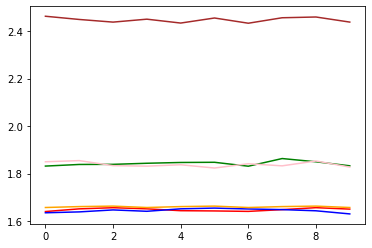

In [8]:
import matplotlib.pyplot as plt
plt.plot([1.64035871, 1.6516192 , 1.65646442, 1.65174803, 1.64387064,
        1.64288313, 1.64099343, 1.64838811, 1.65657639, 1.65055562], color='red') # Baseline no norm
plt.plot([1.6351393 , 1.63885243, 1.64715879, 1.64141364, 1.65178808,
        1.6548407 , 1.6511768 , 1.64851284, 1.64350086, 1.63035403], color='blue') # SVD no normalization
plt.plot([1.83162642, 1.83842444, 1.83894032, 1.84348497, 1.84681301,
        1.84757849, 1.83108851, 1.86333115, 1.84969944, 1.83280018], color='green') # mean KNN with MSD sim metric
plt.plot([1.84980278, 1.85468974, 1.83346668, 1.83132629, 1.83718233,
        1.82342555, 1.84151089, 1.83262617, 1.85301496, 1.82746491], color='pink') # mean KNN with cosine sim metric
plt.plot([2.46206984, 2.44853017, 2.43737914, 2.44974258, 2.43340318,
        2.45466453, 2.43269762, 2.45570293, 2.45888039, 2.4374606 ], color='brown') # NMF factorization
plt.plot([1.6573, 1.6612, 1.6632, 1.6573, 1.6612, 1.6632, 1.6573, 1.6612, 1.6632, 1.6573], color='orange') # SVDpp
plt.show()

### Evaluation
1. 10-fold SVD, no normalization =
  - [1.6351393 , 1.63885243, 1.64715879, 1.64141364, 1.65178808, 1.6548407 , 1.6511768 , 1.64851284, 1.64350086, 1.63035403]
2. 10-fold Baseline, no normalization =
  - [1.64035871, 1.6516192 , 1.65646442, 1.65174803, 1.64387064, 1.64288313, 1.64099343, 1.64838811, 1.65657639, 1.65055562]
3. 10-fold KNN with mean rating normalization and MSD similarity =
  - [1.83162642, 1.83842444, 1.83894032, 1.84348497, 1.84681301, 1.84757849, 1.83108851, 1.86333115, 1.84969944, 1.83280018]

### Grid Search on the best model from above
- RMSE = 1.6501662923469678, params = {'n_epochs': 100, 'n_factors': 250}
- Matrix factorization does better with less latent factors, more epochs did not affect performance much

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [50, 100], 'n_factors': [250, 500, 1000]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

### Make predictions

In [119]:
algo = SVDpp(verbose=True)
algo.fit(data.build_full_trainset())

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19


In [89]:
preds = []

for rating_tuple in test_ratings.values:
    user_id = rating_tuple[0]
    book_id = rating_tuple[1]
    sample_key = "{0}-{1}".format(user_id, book_id)
    pred = algo.predict(user_id, book_id, verbose=False)

    preds.append({'User_Id-Book_Id': sample_key, 'Rating': pred[3]})

In [90]:
preds_df = pd.DataFrame(preds)
preds_df.head()

,User_Id-Book_Id,Rating
0,242-343676,8.126303
1,254-58191,7.474422
2,503-76983,8.084257
3,626-340144,7.836262
4,628-261446,7.377793


In [91]:
preds_df['Rating'].describe()

count    100000.000000
mean          7.665800
std           0.646609
min           3.500718
25%           7.386688
50%           7.603539
75%           7.953138
max          10.000000
Name: Rating, dtype: float64

In [92]:
ratings['Rating'].describe()

count    333627.000000
mean          7.603539
std           1.842235
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Rating, dtype: float64

In [93]:
print (len(preds_df))

100000


In [94]:
preds_df.to_csv('solution_baseline.csv', index=False)

### Explore Book metadata

In [24]:
metadata = pd.read_csv('./data/Book_Info.csv')[['Title', 'Publication_Year', 'Image_L_URL', 'Author']]
metadata['Publication_Year'] = metadata['Publication_Year'].astype(int)

In [25]:
metadata.head()

,Title,Publication_Year,Image_L_URL,Author
0,Zombies,2000,http://images.amazon.com/images/P/2264026545.0...,Bret Easton Ellis
1,The Wicked Priest: An Allegory in Two Acts,2000,http://images.amazon.com/images/P/1587214768.0...,Bob Levis
2,The Wondering Life,2003,http://images.amazon.com/images/P/1414025696.0...,Colleen Cherwinski
3,Power Health - Back to Basics,2003,http://images.amazon.com/images/P/1410775488.0...,Dr Martin P. Rutherford
4,"See a Grown Man Cry, Now Watch Him Die",1997,http://images.amazon.com/images/P/1880985373.0...,Henry Rollins


### Filter invalid years

In [51]:
print('full size', len(metadata))
metadata = metadata[metadata['Publication_Century'] >= 19]
print('after filter >= 1900', len(metadata))
metadata = metadata[metadata['Publication_Century'] <= 20]
print('after filter <= 2021', len(metadata))

full size 266743
after filter >= 1900 266743
after filter <= 2021 266743


In [27]:
metadata['Publication_Decade'] = ((metadata['Publication_Year'] % 100) // 10) * 10
metadata['Publication_Century'] = metadata['Publication_Year'] // 100
metadata = metadata.drop(['Publication_Year'], axis=1)

In [45]:
metadata.head()

,Image_L_URL,Author,Publication_Decade,Publication_Century,nouns,verbs
0,http://images.amazon.com/images/P/2264026545.0...,Bret Easton Ellis,0,20,zombies,
1,http://images.amazon.com/images/P/1587214768.0...,Bob Levis,0,20,priest allegory acts,
2,http://images.amazon.com/images/P/1414025696.0...,Colleen Cherwinski,0,20,life,
3,http://images.amazon.com/images/P/1410775488.0...,Dr Martin P. Rutherford,0,20,power health basics,
4,http://images.amazon.com/images/P/1880985373.0...,Henry Rollins,90,19,man cry,see watch die


### Get parts of speech

In [29]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def get_pos(sentences):
    all_nouns = []
    all_verbs = []
    
    for sent in sentences:
        sent = nltk.word_tokenize(sent.lower())
        nouns = ''
        verbs = ''

        for pos in nltk.pos_tag(sent):

            if pos[-1] == 'NN' or pos[-1] == 'NNS':
                nouns += pos[0]
                nouns += ' '

            if pos[-1] == 'VBP' or pos[-1] == 'VB':
                verbs += pos[0]
                verbs += ' '

        all_nouns.append(nouns.strip())
        all_verbs.append(verbs.strip())
    
    return all_nouns, all_verbs

nouns, verbs = get_pos(metadata['Title'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/soniamannan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [42]:
metadata['nouns'] = nouns
metadata['verbs'] = verbs
metadata = metadata.drop(['Title'], axis=1)
metadata.head()

,Image_L_URL,Author,Publication_Decade,Publication_Century,nouns,verbs
0,http://images.amazon.com/images/P/2264026545.0...,Bret Easton Ellis,0,20,zombies,
1,http://images.amazon.com/images/P/1587214768.0...,Bob Levis,0,20,priest allegory acts,
2,http://images.amazon.com/images/P/1414025696.0...,Colleen Cherwinski,0,20,life,
3,http://images.amazon.com/images/P/1410775488.0...,Dr Martin P. Rutherford,0,20,power health basics,
4,http://images.amazon.com/images/P/1880985373.0...,Henry Rollins,90,19,man cry,see watch die


### One hot encode text

In [63]:
features = metadata[['Publication_Decade', 'Publication_Century', 'nouns', 'verbs']]
features.head()

,Publication_Decade,Publication_Century,nouns,verbs
0,0,20,zombies,
1,0,20,priest allegory acts,
2,0,20,life,
3,0,20,power health basics,
4,90,19,man cry,see watch die


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
pd.concat([metadata, pd.DataFrame(enc.fit_transform(metadata[['nouns']]).toarray()) ])

In [81]:
meta_ratings = pd.concat([metadata.rename(columns={"BOOK_ID": "Book_Id"}), ratings], join="inner", axis=1)

- Year to decade
- Named entities from the title
- Genre (based on title, image, and author?)
- Sentiment of the title
- Publisher name

In [38]:
def get_vocab_size(words):
    import string
    vocab = set()
    max_word_len = 0
    
    for title in words:
        for word in title.split():
            new_word = "".join(l for l in word.lower() if l not in string.punctuation)
            vocab.add(new_word)
            max_word_len = max(len(new_word), max_word_len)
    
    return len(vocab), max_word_len

In [106]:
len_vocab, max_word_len = get_vocab_size(meta_ratings['Title'])
print (len_vocab, max_word_len)

89573 40


In [40]:
len_vocab, max_word_len = get_vocab_size(metadata['nouns'])
print (len_vocab, max_word_len)

65676 40


In [41]:
len_vocab, max_word_len = get_vocab_size(metadata['verbs'])
print (len_vocab, max_word_len)

6842 22
